In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load the data
url = '/content/sample_data/Filtered_Phenotypic_Data.csv'  # Replace with your file path or URL
data = pd.read_csv(url)
# Display the first few rows of the dataset
print(data.head())



   SUB_ID       FILE_ID  AGE_AT_SCAN  DX_GROUP  anat_cnr  anat_efc  anat_fber  \
0   50004  Pitt_0050004        19.09         1  7.698144  1.226218   9.725750   
1   50005  Pitt_0050005        13.73         1  9.071807  1.256278  11.198226   
2   50006  Pitt_0050006        13.37         1  8.026798  1.407166   6.282055   
3   50007  Pitt_0050007        17.78         1  5.775897  1.161231   6.991093   
4   50008  Pitt_0050008        32.45         1  6.669686  1.241491   7.945937   

   anat_fwhm  anat_qi1   anat_snr  func_efc  func_fber  func_fwhm  func_dvars  \
0   3.881684  0.174186   9.323463  0.578960  63.317943   1.866104    1.180605   
1   3.628667  0.119269  10.814200  0.556064  70.800354   1.918278    1.092030   
2   3.674539  0.130647  10.123574  0.562942  75.364679   2.213873    1.086830   
3   4.104707  0.236214   7.638746  0.607554  64.682109   1.834521    1.099380   
4   3.831462  0.131733   8.507972  0.571447  60.682083   1.909622    1.038369   

   func_outlier  func_qual

In [3]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
# Separate features and target
X = data.drop(columns=['DX_GROUP'])  # Features
y = data['DX_GROUP']  # Target


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Initialize the base estimator and AdaBoost model
base_estimator = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Impute missing values using SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
# Train the model
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8361581920903954
Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.77      0.82        84
           2       0.81      0.89      0.85        93

    accuracy                           0.84       177
   macro avg       0.84      0.83      0.83       177
weighted avg       0.84      0.84      0.84       177



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


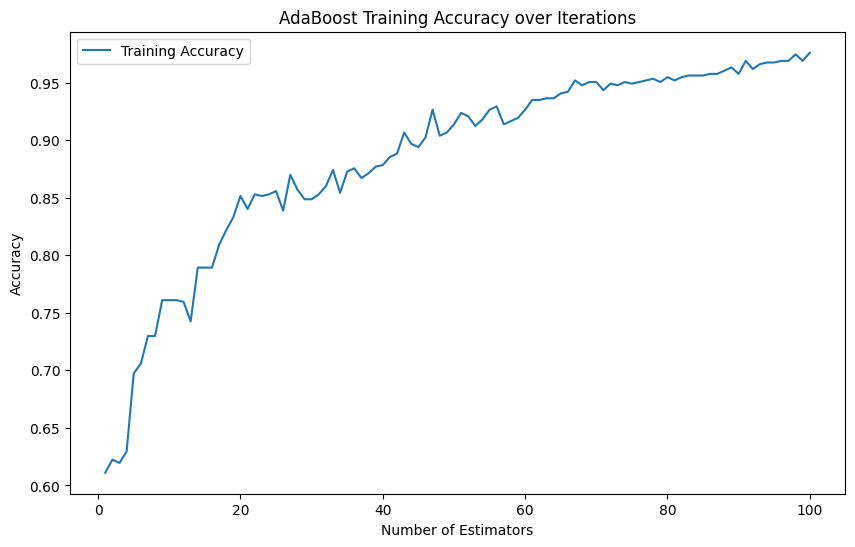

In [9]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the model
ada_model.fit(X_train, y_train)

# Track training accuracy over iterations
training_errors = np.zeros((ada_model.n_estimators,), dtype=float)
for i, y_pred_train in enumerate(ada_model.staged_predict(X_train)):
    training_errors[i] = accuracy_score(y_train, y_pred_train)

# Plot accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, ada_model.n_estimators + 1), training_errors, label='Training Accuracy')
plt.title('AdaBoost Training Accuracy over Iterations')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:

y_pred = ada_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Generate classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Accuracy: 0.8361581920903954
Precision: 0.8388501163177134
Recall: 0.8361581920903954
F1-score: 0.8353021245889811
Classification Report:
              precision    recall  f1-score   support

           1       0.87      0.77      0.82        84
           2       0.81      0.89      0.85        93

    accuracy                           0.84       177
   macro avg       0.84      0.83      0.83       177
weighted avg       0.84      0.84      0.84       177



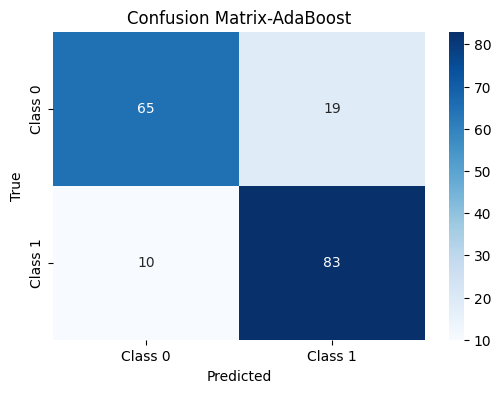

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix-AdaBoost')
plt.show()